In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

PATH = '../../../../Latex/Drosophila/Figures/'

In [2]:
raw_data = np.loadtxt('../../dmel_data.txt').T  # transpose the data so that the shape is 6078 cells x (3+6*99) columns
gene_exp = np.copy(raw_data[:,3:])  # excluding (x,y,z) coordinates)

complete_all = ([int(x) - 1 for x in open('../../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

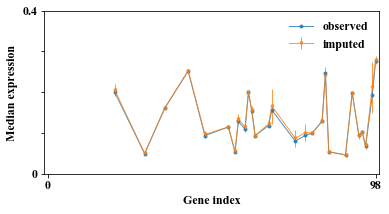

In [3]:
matplotlib.rcParams['legend.frameon'] = False
matplotlib.rcParams.update({'font.size':12})
matplotlib.rcParams.update({'font.family':'Times New Roman'})

with open('../pickles/imputed_10.pkl', 'rb') as f:
    res = pickle.load(f)
    
mean_of_med = np.mean([res[i]['med'] for i in range(10)], axis=0)
std_of_med = np.std([res[i]['med'] for i in range(10)], axis=0)
data = np.median(np.vstack([gene_exp[:, i::6] for i in range(6)])[:, comp_ind], axis=0)

plt.figure(figsize=(6,3))
plt.plot(comp_ind, data, 'o-', ms=3, linewidth=1, alpha=0.8, label='observed')
plt.errorbar(comp_ind, mean_of_med[comp_ind], yerr=std_of_med[comp_ind], fmt='v-', ms=3, linewidth=1, alpha=0.8, label='imputed')
plt.xlabel('Gene index')
plt.ylabel('Median expression')
plt.xlim(-1,99)
plt.xticks([0,98],['0','98'])
plt.ylim(0,0.4)
plt.yticks([0,0.1,0.2,0.3,0.4],['0','','','','0.4'])
plt.legend()
plt.savefig(PATH+'fig1.pdf', bbox_inches='tight')
plt.show()

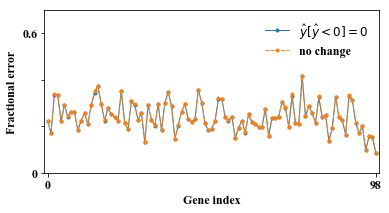

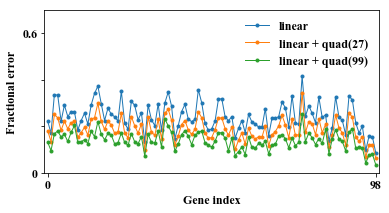

In [4]:
matplotlib.rcParams.update({'font.size':12})
matplotlib.rcParams.update({'font.family':'Times New Roman'})
matplotlib.rcParams['legend.frameon'] = False

with open('../pickles/skl_linear.pkl', 'rb') as f:
    LS_lin = pickle.load(f)    
    
with open('../pickles/skl_linear_neg.pkl', 'rb') as f:
    LS_lin_neg = pickle.load(f)

with open('../pickles/skl_quad.pkl', 'rb') as f:
    LS_quad = pickle.load(f)
    
with open('../pickles/skl_(99,99)_tt.pkl', 'rb') as f:
    LS_99 = pickle.load(f)

# labels = ['linear', 'linear + quad']

# fig = plt.figure(figsize=(6,8.75))
# plt.subplots_adjust(hspace = 0.25)
# ax1 = fig.add_subplot(3,1,1)
# plt.plot(range(99), LS_lin[0][0], 'o-', markersize=3, linewidth=1, label='linear')
# # plt.xlabel('Gene index')
# plt.ylabel('Fractional error')
# plt.xlim(-1,99)
# plt.ylim(0,0.7)
# plt.xticks([0,98],['0','98'])
# plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
# plt.legend(bbox_to_anchor=(0.272,1))
# plt.text(-1, 0.7*1.02, '(A)')

# ax2 = fig.add_subplot(3,1,2)
# plt.plot(range(99), LS_lin[0][0], 'o-', markersize=3, linewidth=1, label='linear')
# plt.plot(range(99), LS_quad[0][0], 'o-', markersize=3, linewidth=1, label='linear + quad(27)')
# # plt.xlabel('Gene index')
# plt.ylabel('Fractional error')
# plt.xlim(-1,99)
# plt.ylim(0,0.7)
# plt.xticks([0,98],['0','98'])
# plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
# plt.legend(bbox_to_anchor=(0.45,1))
# plt.text(0, 0.7*1.02, '(B)')

# ax3 = fig.add_subplot(3,1,3)
# plt.plot(range(99), LS_lin[0][0], 'o-', markersize=3, linewidth=1, label='linear')
# plt.plot(range(99), LS_quad[0][0], 'o-', markersize=3, linewidth=1, label='linear + quad(27)')
# plt.plot(range(99), LS_99[0], 'o-', markersize=3, linewidth=1, label='linear + quad(99)')
# plt.xlabel('Gene index')
# plt.ylabel('Fractional error')
# plt.xlim(-1,99)
# plt.ylim(0,0.7)
# plt.xticks([0,98],['0','98'])
# plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
# plt.legend(bbox_to_anchor=(0.45,1))
# plt.text(0,0.7*1.02, '(C)')
# plt.savefig(PATH+'fig2.pdf', bbox_inches='tight')
# plt.show()

# plt.figure(figsize=(6,3))
# plt.plot(range(99), LS_lin[0][0], 'o-', markersize=3, linewidth=1, label='linear')
# # plt.plot(range(99), skl_quad[0][0], 'o-', linewidth=2, label='linear + quad')
# plt.xlabel('Gene index')
# plt.ylabel('Fractional error')
# plt.xlim(-1,99)
# plt.ylim(0,0.7)
# plt.xticks([0,98],['0','98'])
# plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
# # plt.legend()
# plt.savefig(PATH+'fig2.pdf', bbox_inches='tight')
# plt.show()

plt.figure(figsize=(6,3))
plt.plot(range(99), LS_lin[0][0], 'o-', markersize=3, linewidth=1, label='$\hat{y}[\hat{y} < 0] = 0$')
plt.plot(range(99), LS_lin_neg[0][0], 'o--', markersize=3, linewidth=1, label='no change')
plt.xlabel('Gene index')
plt.ylabel('Fractional error')
plt.xlim(-1,99)
plt.ylim(0,0.7)
plt.xticks([0,98],['0','98'])
plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
plt.legend()
plt.savefig(PATH+'sfig1.pdf', bbox_inches='tight')
plt.show()

# plt.figure(figsize=(6,3))
# plt.plot(range(99), LS_lin[0][0], 'o-', markersize=3, linewidth=1, label='linear')
# plt.plot(range(99), LS_quad[0][0], 'o-', markersize=3, linewidth=1, label='linear + quad(27)')
# plt.xlabel('Gene index')
# plt.ylabel('Fractional error')
# plt.xlim(-1,99)
# plt.ylim(0,0.7)
# plt.xticks([0,98],['0','98'])
# plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
# plt.legend()
# plt.savefig(PATH+'fig3.pdf', bbox_inches='tight')
# plt.show()

plt.figure(figsize=(6,3))
plt.plot(range(99), LS_lin[0][0], 'o-', markersize=3, linewidth=1, label='linear')
plt.plot(range(99), LS_quad[0][0], 'o-', markersize=3, linewidth=1, label='linear + quad(27)')
plt.plot(range(99), LS_99[0], 'o-', markersize=3, linewidth=1, label='linear + quad(99)')
plt.xlabel('Gene index')
plt.ylabel('Fractional error')
plt.xlim(-1,99)
plt.ylim(0,0.7)
plt.xticks([0,98],['0','98'])
plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
plt.legend()
plt.savefig(PATH+'fig2.pdf', bbox_inches='tight')
plt.show()

In [5]:
with open('../pickles/skl_linear_neg.pkl', 'rb') as f:
    skl_linear_neg = pickle.load(f)
    
yp = np.concatenate((skl_linear_neg[0][-1]))
print(len(yp[yp<0])/yp.size, np.quantile(yp[yp<0], 0.01), np.min(yp))
      
with open('../pickles/skl_quad_neg.pkl', 'rb') as f:
    skl_quad_neg = pickle.load(f)
    
yp = np.concatenate((skl_quad_neg[0][-1]))
print(len(yp[yp<0])/yp.size, np.quantile(yp[yp<0], 0.01), np.min(yp))

with open('../pickles/skl_(99,99)_tt_neg.pkl', 'rb') as f:
    neg = pickle.load(f)
    
yp = np.concatenate((neg[-1]))
print(len(yp[yp<0])/yp.size, np.quantile(yp[yp<0], 0.01), np.min(yp))

0.013034923104024782 -0.13272604622424305 -0.3713432027550876
0.0091151727874334 -0.1309899246311091 -0.36572796243884625
0.006991600772449736 -0.09129641506764347 -0.2651992008141593


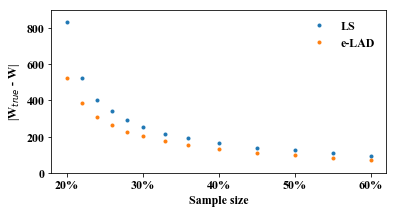

In [6]:
with open('../pickles/skl_(99,99)_tv.pkl', 'rb') as f:
    skl = pickle.load(f)
w_skl = skl['w'].T

with open('../pickles/LAD_(99,99)_ttv.pkl', 'rb') as f:
    LAD = pickle.load(f)
w_LAD = LAD['w']

ratio = [20,22,24,26,28,30,33,36,40,45,50,55,60]

diff_LAD = []
for r in ratio:
    w = np.zeros((4950,99))
    bias = np.zeros(99)
    for k in range(990):
        i = int(k/10)
        with open('../pickles/titrate_%s/res_%s.pkl' % (r,k), 'rb') as f:
            res = pickle.load(f)
        w[:, i:(i+1)] += res[0]
    w = w/10
    diff_LAD.append(np.linalg.norm(w_LAD - w))
    
ratio = [0.2,0.22,0.24,0.26,0.28,0.3,0.33,0.36,0.4,0.45,0.5,0.55,0.6]

with open('../pickles/titration_skl.pkl', 'rb') as f:
    res_skl = pickle.load(f)

plt.figure(figsize=(6,3))
diff_skl =[np.linalg.norm(w_skl-res_skl[i]['w'][0]) for i in range(13)]
plt.plot(ratio, diff_skl, 'o', c='tab:blue', ms=3, label='LS')
plt.plot(ratio, diff_LAD, 'o', c='tab:orange', ms=3, label='e-LAD')
plt.xticks([0.2,0.3,0.4,0.5,0.6],['20%','30%','40%','50%','60%'])
plt.xlim(0.18,0.62)
plt.ylim(0,900)
plt.ylabel('|W$_{true}$ - W|')
plt.xlabel('Sample size')
plt.legend()
plt.savefig(PATH+'fig3.pdf', bbox_inches='tight')

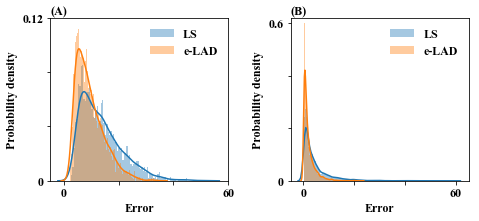

In [7]:
data_all = np.loadtxt('../../data_complete.txt')
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])
all_diff = np.vstack([all_bin[i+1]-all_bin[i] for i in range(5)])

def make_quad(X):
    quad = np.zeros((int(X.shape[0]), int(X.shape[1] + (X.shape[1]*(X.shape[1]-1))/2)))
    quad[:, :X.shape[1]] = np.copy(X)
    col = X.shape[1]
    for i in range(X.shape[1]-1):
        for j in range(i+1, X.shape[1]):
            quad[:,col] = (X[:,i]*X[:,j])
            col += 1
    return quad

with open('../pickles/validation_cells.pkl', 'rb') as f:
    cells_v = pickle.load(f)

val = np.hstack([cells_v+(6078*i) for i in range(5)])

X_v = all_init[val]
quad_v = make_quad(X_v)
y_v = all_diff[val]

w = np.zeros((4950,99))
bias = np.zeros(99)
for k in range(990):
    i = int(k/10)
    with open('../pickles/titrate_20/res_%s.pkl' % (k), 'rb') as f:
        res = pickle.load(f)
    w[:,i:(i+1)] += res[0]
    bias[i] += res[1]
w = w/10
bias = bias/10

yp = X_v + bias + quad_v.dot(w)
yp[yp<0] = 0
ya = X_v + y_v

error_lad = np.abs(yp-ya)

with open('../pickles/titration_skl.pkl', 'rb') as f:
    res_skl = pickle.load(f)
    
error_skl = res_skl[0]['error'][0]

fig = plt.figure(figsize=(7.5,3))
plt.subplots_adjust(wspace = 0.35)
ax1 = fig.add_subplot(1,2,1)
sns.distplot(np.sum(error_skl, axis=1), kde_kws=dict(linewidth=1.5), bins=100, label='LS')
sns.distplot(np.sum(error_lad, axis=1), kde_kws=dict(linewidth=1.5), bins=100, label='e-LAD')
plt.xlim(-5,60)
plt.xticks([0,20,40,60],['0','','','60'])
plt.ylim(0,0.12)
plt.yticks([0,0.04,0.08,0.12],['0','','','0.12'])
plt.xlabel('Error')
plt.ylabel('Probability density')
plt.legend()
plt.text(-5, 0.12*1.02, '(A)')

ax2 = fig.add_subplot(1,2,2)
sns.distplot(np.sum(error_skl**2, axis=1), kde_kws=dict(linewidth=1.5), bins=100, label='LS')
sns.distplot(np.sum(error_lad**2, axis=1), kde_kws=dict(linewidth=1.5), bins=100, label='e-LAD')
plt.xlim(-5,65)
plt.ylim(0,0.62)
plt.xticks([0,20,40,60],['0','','','60'])
plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
plt.xlabel('Error')
plt.ylabel('Probability density')
plt.legend()
plt.text(-5, 0.62*1.02, '(B)')
plt.savefig(PATH+'fig4.pdf', bbox_inches='tight')
plt.show()

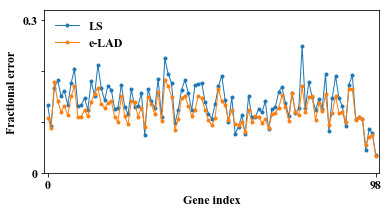

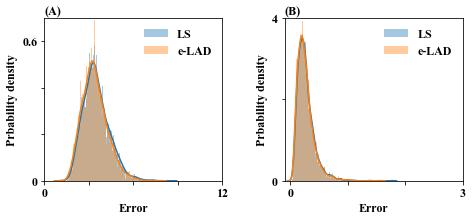

In [8]:
with open('../pickles/LAD_(99,99)_ttv.pkl', 'rb') as f:
    LAD = pickle.load(f)
with open('../pickles/skl_(99,99)_tv.pkl', 'rb') as f:
    LS = pickle.load(f)
    
plt.figure(figsize=(6,3))
plt.plot(range(len(LS['ferror'])), LS['ferror'], 'o-', ms=3, lw=1, label='LS')
plt.plot(range(len(LAD['ferror'])), LAD['ferror'], 'o-', ms=3, linewidth=1, label='e-LAD')
plt.xlim(-1,99)
plt.xticks([0,98],['0','98'])
plt.ylim(0,0.32)
plt.yticks([0,0.1,0.2,0.3],['0','','','0.3'])
plt.legend()
plt.xlabel('Gene index')
plt.ylabel('Fractional error')
plt.savefig(PATH+'fig5.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(7.5,3))
plt.subplots_adjust(wspace = 0.35)
ax1 = fig.add_subplot(1,2,1)
error_skl = np.sum(LS['error'], axis=1)
sns.distplot(error_skl, bins=100, label='LS')
error_lad = np.sum(LAD['error'], axis=1)
sns.distplot(error_lad, bins=100, label='e-LAD')
plt.xlim(0,12)
plt.xticks([0,3,6,9,12], ['0','','','','12'])
plt.ylim(0,0.7)
plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Error')
plt.ylabel('Prbability density')
plt.text(0,0.7*1.02,'(A)')

ax2 = fig.add_subplot(1,2,2)
error_skl = np.sum(LS['error']**2, axis=1)
sns.distplot(error_skl, kde_kws=dict(linewidth=1.5), bins=100, label='LS')
error_lad = np.sum(LAD['error']**2, axis=1)
sns.distplot(error_lad, kde_kws=dict(linewidth=1.5), bins=100, label='e-LAD')
plt.xlim(-0.1, 3)
plt.xticks([0,1,2,3],['0','','','3'])
plt.ylim(0,4)
plt.yticks([0,2,4],['0','','4'])
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Error')
plt.ylabel('Prbability density')
plt.text(-0.1,4*1.02, '(B)')
plt.savefig(PATH+'fig6.pdf', bbox_inches='tight')
plt.show()
